
# Project 1: World Development Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
co2_per_capita = pd.read_csv("../data/co2_pcap_cons.csv")
co2_per_capita.head()
co2pc_2022 = co2_per_capita["2022"]
co2pc_2020 = co2_per_capita["2020"]

high_co2_mask = co2pc_2022 > co2pc_2022.quantile(0.65)
low_co2_mask = co2pc_2022 < co2pc_2022.quantile(0.35)
high_co2_countries = co2_per_capita.loc[high_co2_mask, "country"]
low_co2_countries = co2_per_capita.loc[low_co2_mask, "country"]

In [20]:
co2pc_2022.describe()

count    194.000000
mean       4.776948
std        5.342481
min        0.026000
25%        0.910000
50%        2.795000
75%        6.802500
max       27.300000
Name: 2022, dtype: float64

Text(0, 0.5, 'Number of Countries')

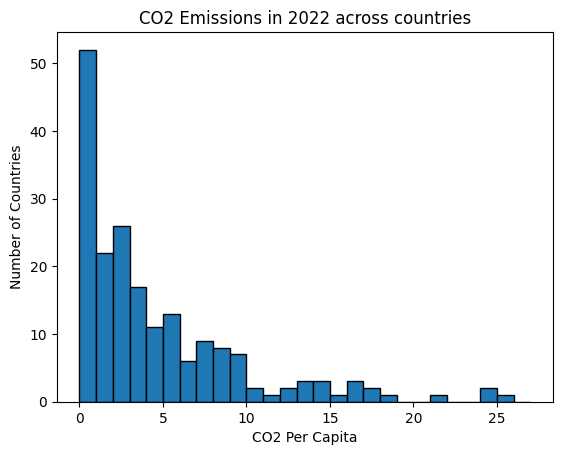

In [26]:
plt.hist(co2pc_2022, density=False, bins=range(0,28,1), edgecolor="Black")
plt.title("CO2 Emissions in 2022 across countries")
plt.xlabel("CO2 Per Capita")
plt.ylabel("Number of Countries")

Text(0, 0.5, 'Number of Countries')

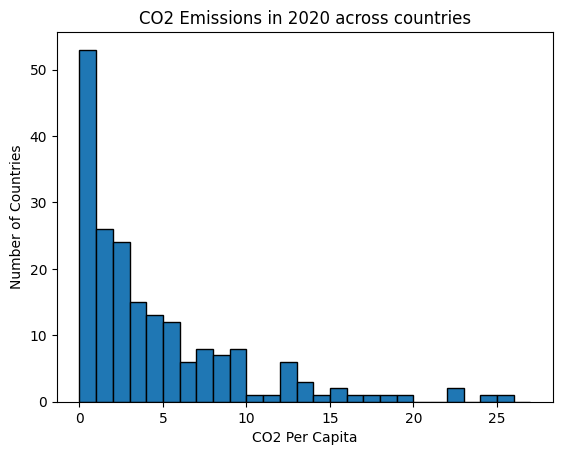

In [27]:
plt.hist(co2pc_2020, density=False, bins=range(0,28,1), edgecolor="Black")
plt.title("CO2 Emissions in 2020 across countries")
plt.xlabel("CO2 Per Capita")
plt.ylabel("Number of Countries")

In [60]:
#Finding countries with high population, low GNI, and low CO2 emissions in 2022
population = pd.read_csv("../data/population.csv")
population_2022 = population["2022"]
gni = pd.read_csv("../data/gni_per_cap_atlas_method_con2021.csv")
gni_2022 = gni["2022"]
population_2022.info()

<class 'pandas.core.series.Series'>
RangeIndex: 197 entries, 0 to 196
Series name: 2022
Non-Null Count  Dtype 
--------------  ----- 
196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [42]:
#Data Cleaning ("k" or "M")
def convert_float(series):
    converted_list = []
    for i in series:
        if type(i) == float:
            converted_list.append(i)
            continue
        if i[-1] == "M":
            num = float(i[:-1]) * 1000000
            converted_list.append(num)
        elif i[-1] == "B":
            num = float(i[:-1]) * 1000000000
            converted_list.append(num)
        elif i[-1] == "k":
            num = float(i[:-1]) * 1000
            converted_list.append(num)
        else:
            converted_list.append(float(i))
    return pd.Series(converted_list)

converted_pop = convert_float(population_2022)

In [96]:
converted_gni = convert_float(gni_2022)
low_gni_mask = converted_gni < converted_gni.quantile(0.35)
high_gni_mask = converted_gni >= converted_gni.quantile(0.65)

high_pop_mask = converted_pop > converted_pop.quantile(0.65)
low_pop_mask = converted_pop < converted_pop.quantile(0.35)

high_pop_countries = population.loc[high_pop_mask, "country"]
low_pop_countries = population.loc[low_pop_mask, "country"]

high_gni_countries = gni.loc[high_gni_mask, "country"]
low_gni_countries = gni.loc[low_gni_mask, "country"]

In [75]:
low_co2_countries.info()

<class 'pandas.core.series.Series'>
Index: 49 entries, 0 to 193
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
49 non-null     object
dtypes: object(1)
memory usage: 784.0+ bytes


In [107]:
high_gni_countries.head(100)

3      United Arab Emirates
6       Antigua and Barbuda
7                 Australia
8                   Austria
11                  Belgium
               ...         
163              Seychelles
172     Trinidad and Tobago
174                  Turkey
179                 Uruguay
180           United States
Name: country, Length: 67, dtype: object

In [111]:
high_pop_countries[high_pop_countries.isin(["United States"])]

186    United States
Name: country, dtype: object

In [112]:
high_co2_countries[high_co2_countries.isin(["United States"])]

183    United States
Name: country, dtype: object

In [103]:
def find_intersection_2(x, y):
    return x[x.isin(y)]

def find_intersection_3(x, y, z):
    a = find_intersection_2(x, y)
    return find_intersection_2(a, z)

group1 = find_intersection_3(low_gni_countries, high_pop_countries, low_co2_countries)
group1.head(30)

0           Afghanistan
1                Angola
13         Burkina Faso
14           Bangladesh
32        Cote d'Ivoire
33             Cameroon
34     Congo, Dem. Rep.
54             Ethiopia
62                Ghana
88                Kenya
108          Madagascar
113                Mali
115             Myanmar
118          Mozambique
121              Malawi
124               Niger
125             Nigeria
129               Nepal
133            Pakistan
148               Sudan
165                Chad
176            Tanzania
177              Uganda
183           Venezuela
187               Yemen
189              Zambia
Name: country, dtype: object

In [104]:
group2 = find_intersection_3(low_gni_countries, high_pop_countries, high_co2_countries)
group2.head()

79    Iran
Name: country, dtype: object

In [106]:
group3 = find_intersection_3(high_gni_countries, low_pop_countries, high_co2_countries)
group3.head(30)

6      Antigua and Barbuda
16                 Bahrain
24                  Brunei
41                  Cyprus
53                 Estonia
73                 Croatia
81                 Iceland
94                  Kuwait
103              Lithuania
104             Luxembourg
105                 Latvia
114                  Malta
120              Mauritius
130                  Nauru
137                  Palau
143                  Qatar
160               Slovenia
163             Seychelles
172    Trinidad and Tobago
Name: country, dtype: object